In [ ]:
# Bar Graph Section

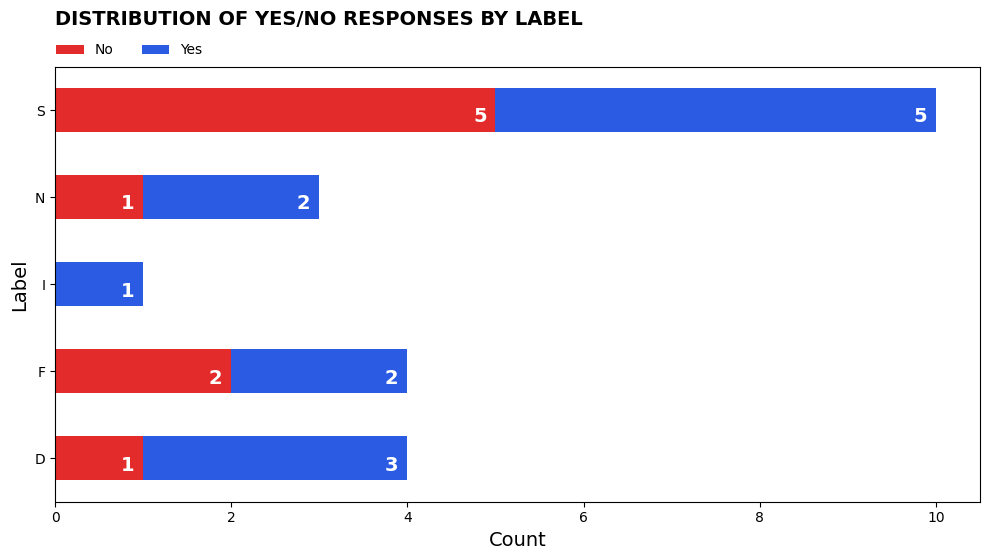

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from external CSV file
df = pd.read_csv('../data/bar_assignment.csv')

# Convert binary values to "Yes"/"No"
df['COUNT'] = df['COUNT'].map({1: 'Yes', 0: 'No'})

# Create a cross-tabulation of the data
cross_tab = pd.crosstab(df['LABEL'], df['COUNT'])

# Sort the index alphabetically
cross_tab = cross_tab.sort_index()

# Create the horizontal stacked bar chart
ax = cross_tab.plot(kind='barh', stacked=True, 
                    color=['#E32B2B', '#2B5BE3'],  # Red for No, Blue for Yes
                    figsize=(10, 6))

# Customize the plot
plt.title('DISTRIBUTION OF YES/NO RESPONSES BY LABEL', fontsize=14, pad=30, loc='left', fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Label', fontsize=14)


# Add value labels on the bars, aligned to bottom-right
for container in ax.containers:
    # Create labels for each bar segment (skip label if count is 0)
    labels = [f"{int(v)}" if v > 0 else "" for v in container.datavalues]
    # Add labels using 'edge' type and customize alignment
    for rect, label in zip(container, labels):
        if label:  # Only add non-empty labels
            height = rect.get_height()  # Get height of the bar
            padding = 0.1
            ax.text(
                rect.get_x() + rect.get_width() - padding,  # Add right padding
                rect.get_y() + height / 8,                 # Align near the bottom of the bar
                label,                                     # Label value
                ha='right',                                # Horizontal alignment
                va='bottom',                               # Vertical alignment
                color='white',                             # Font color
                fontsize=14,                               # Font size
                fontweight='bold'                          # Make text bold
            )

# Adjust legend position below the title on a single line
plt.legend(['No', 'Yes'], loc='upper left', bbox_to_anchor=(-.0125, 1.0825), ncol=3, frameon=False)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()

# Sankey Section

In [58]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

# Read the data
df = pd.read_csv('../data/sankey_assignment.csv')

# Define the source categories and target categories
source_cols = ['PS', 'OMP', 'CNP', 'NRP', 'NMCCC', 'PEC', 'NCDM', 'RGS']
middle_cols = ['S', 'F', 'D', 'N', 'I']
target_cols = ['Reg', 'Aca', 'Oth']

# Create lists to store the Sankey diagram data
source_list = []
target_list = []
value_list = []

# Function to get node index
def get_node_index(node, node_labels):
    return node_labels.index(node)

# Create node labels list
node_labels = source_cols + middle_cols + target_cols

# Source to middle connections
for src_col in source_cols:
    for mid_col in middle_cols:
        value = df.loc[df['LABEL'] == mid_col, src_col].values[0]
        if value > 0:
            source_list.append(get_node_index(src_col, node_labels))
            target_list.append(get_node_index(mid_col, node_labels))
            value_list.append(value)

# Middle to target connections
for mid_col in middle_cols:
    for tgt_col in target_cols:
        value = df.loc[df['LABEL'] == mid_col, tgt_col].values[0]
        if value > 0:
            source_list.append(get_node_index(mid_col, node_labels))
            target_list.append(get_node_index(tgt_col, node_labels))
            value_list.append(value)

# Create color list for nodes using colors from the image
colors = [
    '#FFA07A',  # Salmon pink (PS)
    '#66CDAA',  # Medium aquamarine (OMP)
    '#FFD700',  # Yellow (CNP)
    '#FF69B4',  # Hot pink (NRP)
    '#9370DB',  # Medium purple (NMCCC)
    '#FF8C00',  # Dark orange (PEC)
    '#FF6347',  # Tomato red (NCDM)
    '#20B2AA',  # Light sea green (RGS)
    '#87CEEB',  # Sky blue (S)
    '#4682B4',  # Steel blue (F)
    '#5F9EA0',  # Cadet blue (D)
    '#4169E1',  # Royal blue (N)
    '#1E90FF',  # Dodger blue (I)
    '#98FB98',  # Pale green (ACA)
    '#90EE90',  # Light green (RE)
    '#8FBC8F'   # Dark sea green (OTH)
]

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=node_labels,
        color=colors
    ),
    link=dict(
        source=source_list,
        target=target_list,
        value=value_list,
        color=[colors[src] for src in source_list]  # Color links based on source node color
    )
)])

# Update the layout
fig.update_layout(
    title_text="CATEGORY DISTRIBUTION FLOW",
    font=dict(
        family="Arial Black",    
        size=14,             
        color="black",       
    ),
    title_font=dict(
        size=20,    
        family="Arial Black",
        color="black"
    ),
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
)

# Show the plot
fig.show()

# Networks Section

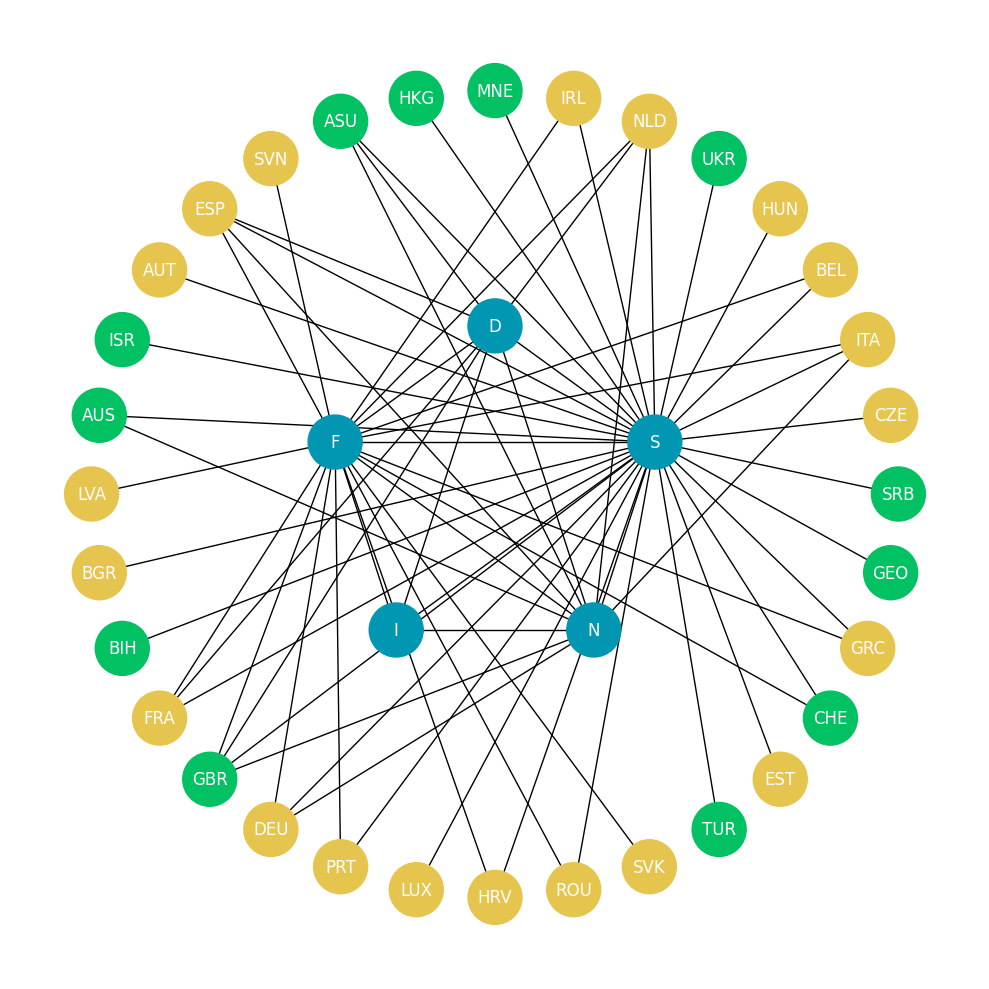

In [68]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Read the data
df = pd.read_csv('../data/networks_assignment.csv')

# Create graph
G = nx.Graph()

# Define node groups
center_nodes = ['D', 'F', 'I', 'N', 'S']
green_nodes = ['BIH', 'GEO', 'ISR', 'MNE', 'SRB', 'CHE', 'TUR', 'UKR', 'GBR', 'AUS', 'HKG', 'ASU']
yellow_nodes = ['AUT', 'BEL', 'BGR', 'HRV', 'CZE', 'EST', 'FRA', 'DEU', 'GRC', 'HUN', 
                'IRL', 'ITA', 'LVA', 'LUX', 'NLD', 'PRT', 'ROU', 'SVK', 'SVN', 'ESP']

# Add nodes
G.add_nodes_from(center_nodes + green_nodes + yellow_nodes)

# Calculate positions for pentagram (center nodes)
pentagon_radius = 0.5
pentagon_angles = np.linspace(0, 2*np.pi, 5, endpoint=False) + np.pi/2
center_pos = {node: (pentagon_radius*np.cos(angle), pentagon_radius*np.sin(angle)) 
              for node, angle in zip(center_nodes, pentagon_angles)}

# Calculate positions for outer nodes
outer_nodes = set(green_nodes + yellow_nodes)
outer_radius = 1.2
outer_angles = np.linspace(0, 2*np.pi, len(outer_nodes), endpoint=False)
outer_pos = {node: (outer_radius*np.cos(angle), outer_radius*np.sin(angle)) 
             for node, angle in zip(outer_nodes, outer_angles)}

# Combine positions
pos = {**center_pos, **outer_pos}

# Add edges from the data
for idx, row in df.iterrows():
    source = row['LABELS']
    for target in df.columns[1:]:
        if row[target] > 0:  # Add an edge only if there's a connection
            G.add_edge(source, target, weight=row[target])  # Add weight for possible future use

# Create color map
color_map = []
for node in G.nodes():
    if node in center_nodes:
        color_map.append('#0197b2')  # Blue
    elif node in green_nodes:
        color_map.append('#01c163')  # Green
    else:
        color_map.append('#e6c54f')  # Yellow

# Create the plot
plt.figure(figsize=(10, 10))
plt.axis('equal')

# Draw nodes
nx.draw_networkx_nodes(G, pos, 
                       node_color=color_map,
                       node_size=1512)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_color='#fdfcfd')

# Draw edges
nx.draw_networkx_edges(G, pos, arrows=False, edge_color='black')


# Remove axes and show plot
plt.axis('off')
plt.tight_layout()
plt.show()